In [325]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
plt.style.use('seaborn-bright')

# Read Data

In [326]:
dataset = pd.read_csv('IMDB-Movie-Data.csv')
dataset.head()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",A group of intergalactic criminals are forced ...,James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi","Following clues to the origin of mankind, a te...",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",Three girls are kidnapped by a man with a diag...,M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family","In a city of humanoid animals, a hustling thea...",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",A secret government agency recruits some of th...,David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [327]:
dataset.tail()

,Rank,Title,Genre,Description,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
995,996,Secret in Their Eyes,"Crime,Drama,Mystery","A tight-knit team of rising investigators, alo...",Billy Ray,"Chiwetel Ejiofor, Nicole Kidman, Julia Roberts...",2015,111,6.2,27585,NaN,45.0
996,997,Hostel: Part II,Horror,Three American college students studying abroa...,Eli Roth,"Lauren German, Heather Matarazzo, Bijou Philli...",2007,94,5.5,73152,17.54,46.0
997,998,Step Up 2: The Streets,"Drama,Music,Romance",Romantic sparks occur between two dance studen...,Jon M. Chu,"Robert Hoffman, Briana Evigan, Cassie Ventura,...",2008,98,6.2,70699,58.01,50.0
998,999,Search Party,"Adventure,Comedy",A pair of friends embark on a mission to reuni...,Scot Armstrong,"Adam Pally, T.J. Miller, Thomas Middleditch,Sh...",2014,93,5.6,4881,NaN,22.0
999,1000,Nine Lives,"Comedy,Family,Fantasy",A stuffy businessman finds himself trapped ins...,Barry Sonnenfeld,"Kevin Spacey, Jennifer Garner, Robbie Amell,Ch...",2016,87,5.3,12435,19.64,11.0


In [328]:
dataset.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [329]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Rank                1000 non-null   int64  
 1   Title               1000 non-null   object 
 2   Genre               1000 non-null   object 
 3   Description         1000 non-null   object 
 4   Director            1000 non-null   object 
 5   Actors              1000 non-null   object 
 6   Year                1000 non-null   int64  
 7   Runtime (Minutes)   1000 non-null   int64  
 8   Rating              1000 non-null   float64
 9   Votes               1000 non-null   int64  
 10  Revenue (Millions)  872 non-null    float64
 11  Metascore           936 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 93.9+ KB


# Data Cleaning

In [330]:
df = dataset

In [331]:
df.shape


(1000, 12)

In [332]:
df = df.drop_duplicates()

In [333]:
df.isna().sum()

Rank                    0
Title                   0
Genre                   0
Description             0
Director                0
Actors                  0
Year                    0
Runtime (Minutes)       0
Rating                  0
Votes                   0
Revenue (Millions)    128
Metascore              64
dtype: int64

In [334]:
df.columns

Index(['Rank', 'Title', 'Genre', 'Description', 'Director', 'Actors', 'Year',
       'Runtime (Minutes)', 'Rating', 'Votes', 'Revenue (Millions)',
       'Metascore'],
      dtype='object')

In [335]:
print(df[(df['Revenue (Millions)'].isna())])


     Rank                           Title                Genre  \
7       8                        Mindhorn               Comedy   
22     23                  Hounds of Love   Crime,Drama,Horror   
25     26                 Paris pieds nus               Comedy   
39     40                       5- 25- 77         Comedy,Drama   
42     43         Don't Fuck in the Woods               Horror   
..    ...                             ...                  ...   
977   978                   Amateur Night               Comedy   
978   979  It's Only the End of the World                Drama   
988   989                         Martyrs               Horror   
995   996            Secret in Their Eyes  Crime,Drama,Mystery   
998   999                    Search Party     Adventure,Comedy   

                                           Description              Director  \
7    A has-been actor best known for playing the ti...            Sean Foley   
22   A cold-blooded predatory couple while crui

In [336]:
print(df[(df['Metascore'].isna())])

     Rank                    Title                      Genre  \
25     26          Paris pieds nus                     Comedy   
26     27  Bahubali: The Beginning     Action,Adventure,Drama   
27     28               Dead Awake            Horror,Thriller   
39     40                5- 25- 77               Comedy,Drama   
42     43  Don't Fuck in the Woods                     Horror   
..    ...                      ...                        ...   
967   968                 The Walk  Adventure,Biography,Crime   
969   970          The Lone Ranger   Action,Adventure,Western   
971   972                Disturbia     Drama,Mystery,Thriller   
989   990                    Selma    Biography,Drama,History   
992   993     Take Me Home Tonight       Comedy,Drama,Romance   

                                           Description              Director  \
25   Fiona visits Paris for the first time to assis...        Dominique Abel   
26   In ancient India, an adventurous and daring ma...     

In [337]:
df.dropna().shape

(838, 12)

In [338]:
df = df.dropna()

In [339]:
df.isna().sum()

Rank                  0
Title                 0
Genre                 0
Description           0
Director              0
Actors                0
Year                  0
Runtime (Minutes)     0
Rating                0
Votes                 0
Revenue (Millions)    0
Metascore             0
dtype: int64

In [340]:
df = df.drop('Description',axis=1)
df.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


# EDA and Data Visualization

#### The most `Genre` Used in All films

In [341]:
df.describe()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
count,838.000000,838.00000,838.000000,838.000000,8.380000e+02,838.000000,838.000000
mean,485.247017,2012.50716,114.638425,6.814320,1.932303e+05,84.564558,59.575179
std,286.572065,3.17236,18.470922,0.877754,1.930990e+05,104.520227,16.952416
min,1.000000,2006.00000,66.000000,1.900000,1.780000e+02,0.000000,11.000000
25%,238.250000,2010.00000,101.000000,6.300000,6.127650e+04,13.967500,47.000000
50%,475.500000,2013.00000,112.000000,6.900000,1.368795e+05,48.150000,60.000000
75%,729.750000,2015.00000,124.000000,7.500000,2.710830e+05,116.800000,72.000000
max,1000.000000,2016.00000,187.000000,9.000000,1.791916e+06,936.630000,100.000000


In [342]:
sns.set_style('darkgrid')

In [343]:
df.corr()

,Rank,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
Rank,1.000000,-0.312809,-0.254783,-0.243125,-0.303284,-0.273170,-0.195909
Year,-0.312809,1.000000,-0.101933,-0.145703,-0.362445,-0.129198,-0.062303
Runtime (Minutes),-0.254783,-0.101933,1.000000,0.374566,0.399298,0.281721,0.221397
Rating,-0.243125,-0.145703,0.374566,1.000000,0.517452,0.217106,0.672731
Votes,-0.303284,-0.362445,0.399298,0.517452,1.000000,0.636833,0.332674
Revenue (Millions),-0.273170,-0.129198,0.281721,0.217106,0.636833,1.000000,0.142397
Metascore,-0.195909,-0.062303,0.221397,0.672731,0.332674,0.142397,1.000000


In [344]:
df.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [345]:
df.loc[df["Revenue (Millions)"] == df["Revenue (Millions)"].max()]

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
50,51,Star Wars: Episode VII - The Force Awakens,"Action,Adventure,Fantasy",J.J. Abrams,"Daisy Ridley, John Boyega, Oscar Isaac, Domhna...",2015,136,8.1,661608,936.63,81.0


In [346]:
df.reindex(df["Revenue (Millions)"].sort_values(ascending=False).index).head(5)["Genre"].unique()

array(['Action,Adventure,Fantasy', 'Action,Adventure,Sci-Fi',
       'Action,Sci-Fi', 'Action,Crime,Drama'], dtype=object)

In [347]:
df[df['Rating'] == df['Rating'].max()]

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


In [348]:
df[df["Votes"]==df["Votes"].max()]

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
54,55,The Dark Knight,"Action,Crime,Drama",Christopher Nolan,"Christian Bale, Heath Ledger, Aaron Eckhart,Mi...",2008,152,9.0,1791916,533.32,82.0


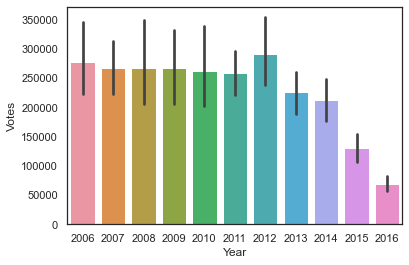

In [349]:
with sns.axes_style('white'):
    g = sns.barplot(x="Year",y="Votes", data=df)

In [350]:
df.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


Text(0, 0.5, 'Revenue \nMillions')

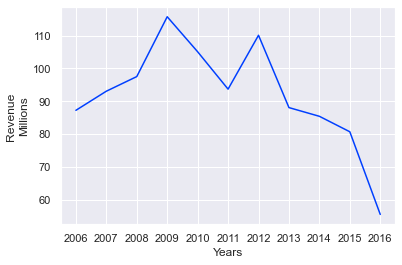

In [351]:
ggroup = df['Revenue (Millions)'].groupby([df['Year']])
ggroup.mean().plot()
plt.xticks(df['Year'].unique())
plt.xlabel("Years")
plt.ylabel('Revenue \nMillions')

In [352]:
df.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


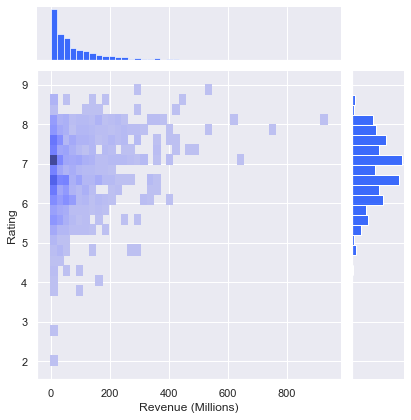

In [353]:
sns.jointplot(x="Revenue (Millions)", y="Rating", data=df, kind='hist');

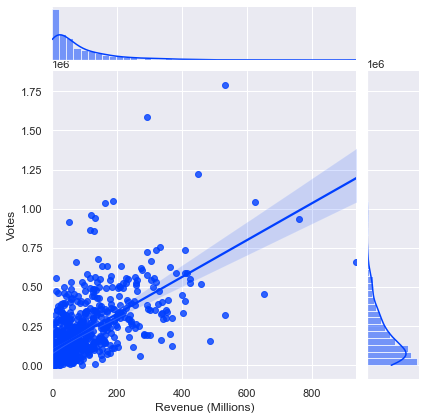

In [354]:
sns.jointplot(x="Revenue (Millions)", y="Votes", data=df, kind='reg');

In [355]:
lenghty_movies = df[['Title',"Runtime (Minutes)"]].sort_values(ascending=False,by='Runtime (Minutes)')[:9]

<AxesSubplot:xlabel='Runtime (Minutes)', ylabel='Title'>

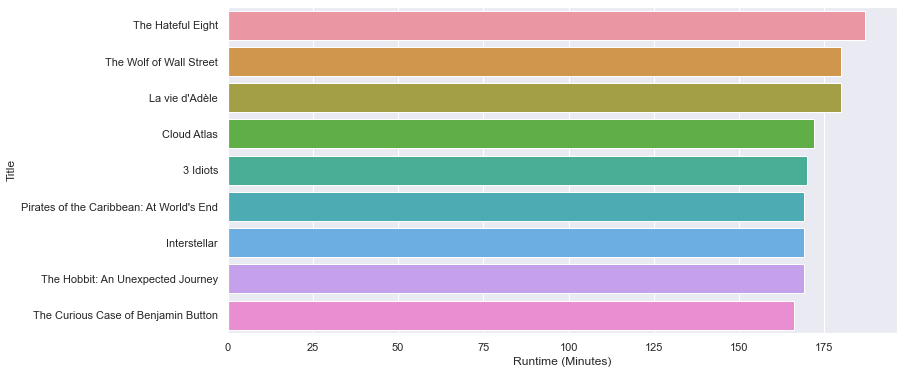

In [356]:
plt.figure(figsize=(12,6))
sns.barplot(y=lenghty_movies['Title'],x=lenghty_movies['Runtime (Minutes)'],orient='h')

In [357]:
df.reindex(df["Runtime (Minutes)"].sort_values(ascending=False).index).head(5)['Title']

88           The Hateful Eight
82     The Wolf of Wall Street
311             La vie d'Adèle
267                Cloud Atlas
430                   3 Idiots
Name: Title, dtype: object

In [358]:
df.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


<AxesSubplot:xlabel='Revenue (Millions)', ylabel='Director'>

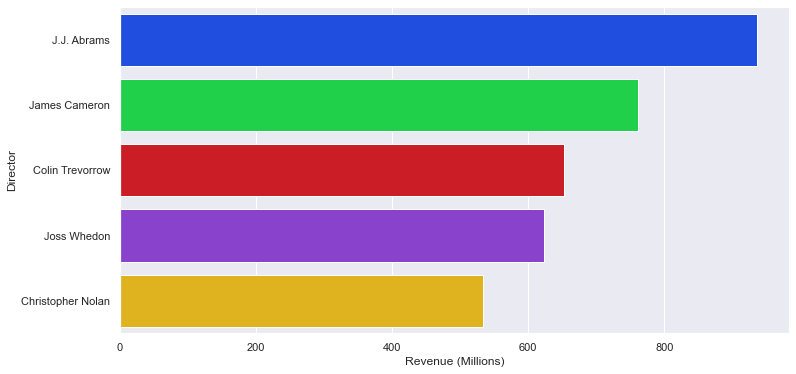

In [359]:
rating_director = df[['Director',"Revenue (Millions)"]].sort_values(ascending=False,by='Revenue (Millions)')[:5]
plt.figure(figsize=(12,6))
sns.barplot(y=rating_director['Director'],x=rating_director['Revenue (Millions)'],orient='h')

In [360]:
df['Year'].value_counts()

2016    198
2015    109
2014     93
2013     84
2012     62
2010     57
2011     57
2008     48
2009     45
2007     44
2006     41
Name: Year, dtype: int64

Text(0, 0.5, 'Number of movie')

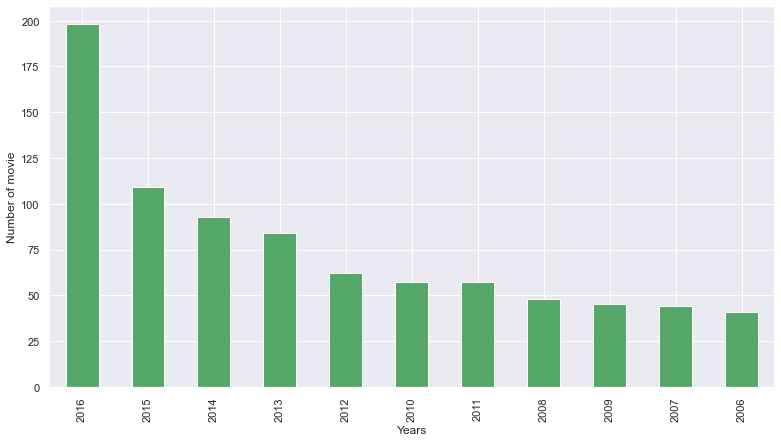

In [361]:
plt.figure(figsize=(13,7))
df['Year'].value_counts().plot(kind='bar',color='g')
plt.xlabel('Years')
plt.ylabel('Number of movie')

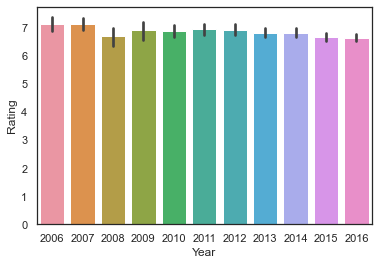

In [362]:
with sns.axes_style('white'):
    g = sns.barplot(x="Year",y="Rating", data=df)

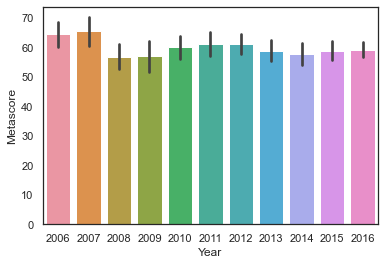

In [363]:
with sns.axes_style('white'):
    g = sns.barplot(x="Year",y="Metascore", data=df)

In [364]:
df[df["Rating"] == df['Rating'].max()]['Actors'].values

array(['Christian Bale, Heath Ledger, Aaron Eckhart,Michael Caine'],
      dtype=object)

In [365]:
df.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),Metascore
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,76.0
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,65.0
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,62.0
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,59.0
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,40.0


In [366]:
all_genres = []
for i in df['Genre'].unique():
    split_items = i.split(',')
    for genre in split_items:
        if genre in all_genres:
            pass
        else :
            all_genres.append(genre)

In [367]:
GenreDF = pd.DataFrame(columns=all_genres,data=np.zeros((df.shape[0],len(all_genres))),index=df["Title"].values)
GenreDF

,Action,Adventure,Sci-Fi,Mystery,Horror,Thriller,Animation,Comedy,Family,Fantasy,Drama,Music,Biography,Romance,History,Western,Crime,War,Musical,Sport
Guardians of the Galaxy,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Prometheus,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Split,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Sing,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suicide Squad,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Resident Evil: Afterlife,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Project X,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Hostel: Part II,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Step Up 2: The Streets,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [368]:
data_action = df["Genre"].unique()
h = []
for data in data_action:
    actions_data = data.split(',')
    if "Action" in actions_data:
        h.append(data)
actions = {}
for i in h:
    actions[i] =1
df['Action'] = df['Genre'].map(actions)

In [369]:
data_genre = df['Genre'].unique()
for genre in all_genres:
    h = []
    for data in data_genre:
        genreData = data.split(',')
        if genre in genreData:
            h.append(data)
    types = {}
    for k in h:
        types[k] = 1
    df[genre] = df['Genre'].map(types)

In [370]:
df.head()

,Rank,Title,Genre,Director,Actors,Year,Runtime (Minutes),Rating,Votes,Revenue (Millions),...,Drama,Music,Biography,Romance,History,Western,Crime,War,Musical,Sport
0,1,Guardians of the Galaxy,"Action,Adventure,Sci-Fi",James Gunn,"Chris Pratt, Vin Diesel, Bradley Cooper, Zoe S...",2014,121,8.1,757074,333.13,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Prometheus,"Adventure,Mystery,Sci-Fi",Ridley Scott,"Noomi Rapace, Logan Marshall-Green, Michael Fa...",2012,124,7.0,485820,126.46,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Split,"Horror,Thriller",M. Night Shyamalan,"James McAvoy, Anya Taylor-Joy, Haley Lu Richar...",2016,117,7.3,157606,138.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Sing,"Animation,Comedy,Family",Christophe Lourdelet,"Matthew McConaughey,Reese Witherspoon, Seth Ma...",2016,108,7.2,60545,270.32,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Suicide Squad,"Action,Adventure,Fantasy",David Ayer,"Will Smith, Jared Leto, Margot Robbie, Viola D...",2016,123,6.2,393727,325.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [372]:
data_Genres = df[all_genres]

In [373]:
data_Genres = data_Genres.fillna(0)

In [374]:
data_Genres

,Action,Adventure,Sci-Fi,Mystery,Horror,Thriller,Animation,Comedy,Family,Fantasy,Drama,Music,Biography,Romance,History,Western,Crime,War,Musical,Sport
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
994,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [375]:
data_Genres["Action"].sum()

277.0

Text(0, 0.5, 'Genre')

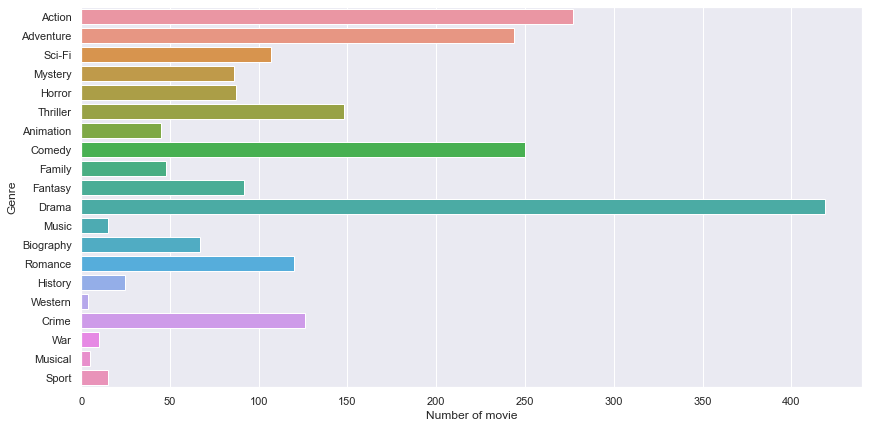

In [377]:
plt.figure(figsize=(14,7))
sns.barplot(y=data_Genres.sum().index,x=data_Genres.sum(),orient='h')
plt.xlabel('Number of movie')
plt.ylabel('Genre')